In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
############PRÉPARATION ET NETOYAGE DES DONNÉES##############
df = pd.read_csv('data.csv')
df['tax'] = df['tax'].fillna(df['tax'].mode()[0])
df['country'] = df['country'].fillna('Inconnu')
df['gender'] = df['gender'].fillna('Inconuu')
############TRANSFORMATION DE COLONNE#######################
df['price_paid'] = (
    df['price_paid']
    .astype(str)
    .str.replace('$','', regex = False)
    .str.replace(',','', regex = False)
    .astype(float)
)
############CRÉATION DE NOUVELLES COLONNES#################
df['price_net'] = df['price_paid'] * (1- (df['tax'] / 100))
df['price_tax'] = df['price_paid'] - df['price_net']
############DIVISION DES DONNÉES PAR PAYS##################
usa = df[df['country'] == 'United States']
maroc = df[df['country'] == 'Morocco']
france = df[df['country'] == 'France']
canada = df[df['country'] == 'Canada'] 
c_inconnu = df[df['country'] == 'Inconnu']
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax,price_net,price_tax
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,5.36,20.0,4.288,1.072
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,8.32,20.0,6.656,1.664
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0,2.984,0.746
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0,2.960,0.740
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,9.24,20.0,7.392,1.848
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,03/24/2021,Duff,Errigo,derrigorn@elpais.com,Female,193.84.247.144,France,3.63,20.0,2.904,0.726
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,Inconnu,4.59,20.0,3.672,0.918
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0,6.032,1.508
998,999,03/17/2021,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,0.183.63.11,United States,5.81,20.0,4.648,1.162


In [3]:
usa_g_pp = (
    usa
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
usa_g_pp

gender
Female     1094.31
Male        960.84
Inconuu     128.52
Name: price_paid, dtype: float64

In [4]:
usa_g_pt = (
    usa
    .groupby('gender')['price_tax']
    .sum()
    .sort_values(ascending = False)
)
usa_g_pt

gender
Female     218.862
Male       192.168
Inconuu     25.704
Name: price_tax, dtype: float64

In [5]:
usa_g_pn = (
    usa
    .groupby('gender')['price_net']
    .sum()
    .sort_values(ascending = False)
)
usa_g_pn

gender
Female     875.448
Male       768.672
Inconuu    102.816
Name: price_net, dtype: float64

In [6]:
usa_g = pd.DataFrame({
    'Prix payé': usa_g_pp ,
    'Prix taxe': usa_g_pt ,
    'Prix net' :usa_g_pn
})
usa_g

,Prix payé,Prix taxe,Prix net
gender,,,
Female,1094.31,218.862,875.448
Male,960.84,192.168,768.672
Inconuu,128.52,25.704,102.816


In [7]:
df.columns

Index(['id', 'date', 'first_name', 'last_name', 'email', 'gender',
       'ip_address', 'country', 'price_paid', 'tax', 'price_net', 'price_tax'],
      dtype='object')

In [8]:
maroc_g_pp = (
    maroc
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
maroc_g_pp

gender
Female     189.67
Male       141.38
Inconuu     31.92
Name: price_paid, dtype: float64

In [9]:
maroc_g_pt = (
    maroc
    .groupby('gender')['price_tax']
    .sum()
    .sort_values(ascending = False)
)
maroc_g_pt

gender
Female     37.934
Male       28.276
Inconuu     6.384
Name: price_tax, dtype: float64

In [10]:
maroc_g_pn = (
    maroc
    .groupby('gender')['price_net']
    .sum()
    .sort_values(ascending = False)
)
maroc_g_pn

gender
Female     151.736
Male       113.104
Inconuu     25.536
Name: price_net, dtype: float64

In [11]:
maroc_g = pd.DataFrame({
    'Prix payé': maroc_g_pp ,
    'Prix taxe': maroc_g_pt ,
    'Prix net' : maroc_g_pn
})
maroc_g

,Prix payé,Prix taxe,Prix net
gender,,,
Female,189.67,37.934,151.736
Male,141.38,28.276,113.104
Inconuu,31.92,6.384,25.536


In [12]:
france_g_pp = (
    france
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
france_g_pp

gender
Female     1263.72
Male       1176.31
Inconuu     179.58
Name: price_paid, dtype: float64

In [13]:
france_g_pt = (
    france
    .groupby('gender')['price_tax']
    .sum()
    .sort_values(ascending = False)
)
france_g_pt

gender
Female     252.744
Male       235.262
Inconuu     35.916
Name: price_tax, dtype: float64

In [14]:
france_g_pn = (
    france
    .groupby('gender')['price_net']
    .sum()
    .sort_values(ascending = False)
)
france_g_pn

gender
Female     1010.976
Male        941.048
Inconuu     143.664
Name: price_net, dtype: float64

In [15]:
france_g = pd.DataFrame({
    'Prix payé': france_g_pp ,
    'Prix taxe': france_g_pt ,
    'Prix net' : france_g_pn
})
maroc_g = pd.DataFrame({
    'Prix payé': maroc_g_pp ,
    'Prix taxe': maroc_g_pt ,
    'Prix net' : maroc_g_pn
})

In [16]:
usa_g

,Prix payé,Prix taxe,Prix net
gender,,,
Female,1094.31,218.862,875.448
Male,960.84,192.168,768.672
Inconuu,128.52,25.704,102.816


In [17]:
france_g

,Prix payé,Prix taxe,Prix net
gender,,,
Female,1263.72,252.744,1010.976
Male,1176.31,235.262,941.048
Inconuu,179.58,35.916,143.664


In [18]:
canada_g_pp = (
    canada
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
canada_g_pp

gender
Female     475.03
Male       458.81
Inconuu     83.61
Name: price_paid, dtype: float64

In [19]:
canada_g_pt = (
    canada
    .groupby('gender')['price_tax']
    .sum()
    .sort_values(ascending = False)
)
canada_g_pt

gender
Female     95.006
Male       91.762
Inconuu    16.722
Name: price_tax, dtype: float64

In [20]:
canada_g_pn = (
    canada
    .groupby('gender')['price_net']
    .sum()
    .sort_values(ascending = False)
)
canada_g_pn

gender
Female     380.024
Male       367.048
Inconuu     66.888
Name: price_net, dtype: float64

In [21]:
canada_g = pd.DataFrame({
    'Prix payé': canada_g_pp ,
    'Prix taxe': canada_g_pt ,
    'Prix net' : canada_g_pn
})
canada_g

,Prix payé,Prix taxe,Prix net
gender,,,
Female,475.03,95.006,380.024
Male,458.81,91.762,367.048
Inconuu,83.61,16.722,66.888


In [22]:
inconnu_g_pp = (
    c_inconnu
    .groupby('gender')['price_paid']
    .sum()
    .sort_values(ascending = False)
)
inconnu_g_pp

gender
Female     142.53
Male        96.27
Inconuu     39.43
Name: price_paid, dtype: float64

In [23]:
inconnu_g_pt = (
    c_inconnu
    .groupby('gender')['price_tax']
    .sum()
    .sort_values(ascending = False)
)
inconnu_g_pt

gender
Female     28.506
Male       19.254
Inconuu     7.886
Name: price_tax, dtype: float64

In [24]:
inconnu_g_pn = (
    c_inconnu
    .groupby('gender')['price_net']
    .sum()
    .sort_values(ascending = False)
)
inconnu_g_pn

gender
Female     114.024
Male        77.016
Inconuu     31.544
Name: price_net, dtype: float64

In [25]:
inconnu_g = pd.DataFrame({
    'Prix payé': inconnu_g_pp ,
    'Prix taxe': inconnu_g_pt ,
    'Prix net': inconnu_g_pn
})
inconnu_g
canada_g = pd.DataFrame({
    'Prix payé': canada_g_pp ,
    'Prix taxe': canada_g_pt ,
    'Prix net' : canada_g_pn
})
canada_g

,Prix payé,Prix taxe,Prix net
gender,,,
Female,475.03,95.006,380.024
Male,458.81,91.762,367.048
Inconuu,83.61,16.722,66.888


In [26]:
data_paid_country = pd.concat(
    {
        'mr': maroc_g,
        'usa': usa_g,
        'fr': france_g,
        'cn': canada_g,
        'p_in': inconnu_g
    },
    names=['country', 'gender']
)
data_paid_country


Prix payé  Prix taxe  Prix net
country gender                                 
mr      Female      189.67     37.934   151.736
        Male        141.38     28.276   113.104
        Inconuu      31.92      6.384    25.536
usa     Female     1094.31    218.862   875.448
        Male        960.84    192.168   768.672
        Inconuu     128.52     25.704   102.816
fr      Female     1263.72    252.744  1010.976
        Male       1176.31    235.262   941.048
        Inconuu     179.58     35.916   143.664
cn      Female      475.03     95.006   380.024
        Male        458.81     91.762   367.048
        Inconuu      83.61     16.722    66.888
p_in    Female      142.53     28.506   114.024
        Male         96.27     19.254    77.016
        Inconuu      39.43      7.886    31.544

<Figure size 10000x5000 with 0 Axes>

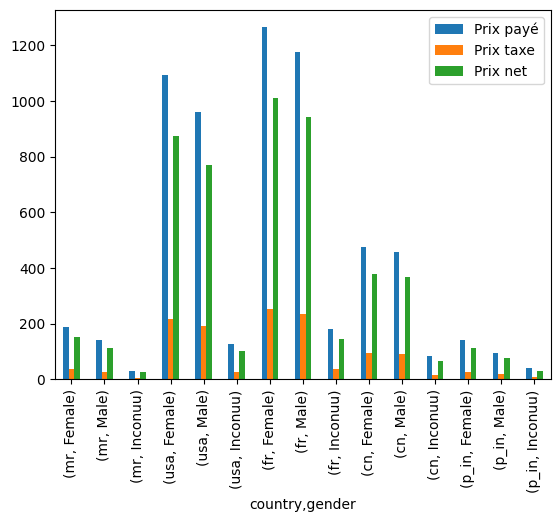

In [27]:
plt.figure(figsize = (100,50))
data_paid_country.plot(kind = 'bar')
plt.xticks(rotation = (90))
plt.show()